In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import  layers


Using TensorFlow backend.


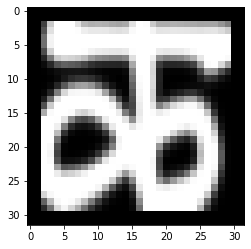

In [2]:
img= cv2.imread('files/train/character_1_ka/10976.png',1)

plt.imshow(img)

In [3]:
gray_image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [4]:
S=32 # shape of your image

trainGen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
testGen = ImageDataGenerator(rescale=1./255)

train_set= trainGen.flow_from_directory('files/Train',
                                        target_size=(S, S),
                                        color_mode='grayscale',
                                       batch_size=32,
                                       class_mode='categorical',
                                       subset="training")
test_set= testGen.flow_from_directory('files/Test',
                                        target_size=(S, S),
                                        color_mode='grayscale',
                                       batch_size=32,
                                       class_mode='categorical')

val_set=trainGen.flow_from_directory('files/Train',
                                        target_size=(S, S),
                                        color_mode='grayscale',
                                       batch_size=32,
                                       class_mode='categorical',
                                       subset="validation")

Found 70380 images belonging to 46 classes.
Found 493 images belonging to 2 classes.
Found 7820 images belonging to 46 classes.


In [5]:
train_set[0][1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPool2D

In [7]:
model = Sequential()
model.add(Conv2D(filters =5,kernel_size=(3,3), padding='same', input_shape=(S,S,1), activation='relu', data_format="channels_last"))
#model.add(Conv2D(filters =5, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(10, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(200,activation='relu'))
model.add(Dense(46,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 5)         50        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 5)         0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 10)        460       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 10)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 490)               0

In [8]:
model.compile('adam', 'categorical_crossentropy',metrics=['acc'])

In [9]:
model.fit_generator(train_set, steps_per_epoch=100,epochs=5,validation_data=val_set,
                           validation_steps=10)

Epoch 1/5
100/100 [==============================] - 6s 65ms/step - loss: 3.3208 - acc: 0.1663 - val_loss: 2.7185 - val_acc: 0.2781
Epoch 2/5
100/100 [==============================] - 4s 36ms/step - loss: 2.0288 - acc: 0.4319 - val_loss: 1.9899 - val_acc: 0.4719
Epoch 3/5
100/100 [==============================] - 4s 35ms/step - loss: 1.6025 - acc: 0.5619 - val_loss: 1.7785 - val_acc: 0.4812
Epoch 4/5
100/100 [==============================] - 4s 35ms/step - loss: 1.4184 - acc: 0.6019 - val_loss: 1.4702 - val_acc: 0.6250
Epoch 5/5
100/100 [==============================] - 4s 36ms/step - loss: 1.1981 - acc: 0.6541 - val_loss: 1.3501 - val_acc: 0.6219


In [10]:
#model.fit(train_set, epochs=5,steps_per_epoch=70380,validation_data=val_set,validation_steps=7820)

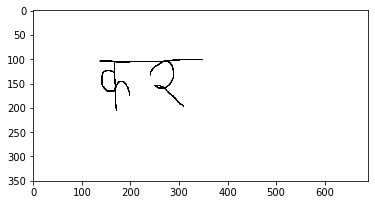

In [11]:
image= cv2.imread('filo/filo/DCR/kaaraa.png',0)
img = image.copy()
plt.imshow(img, cmap="gray")

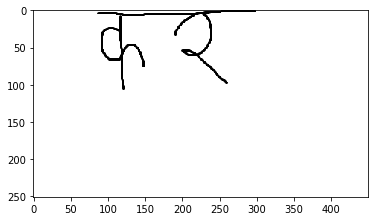

In [12]:
plt.imshow(img[100:500,50:500],cmap="gray")  #manually cropping image from row and column

In [13]:
#testGen=ImageDataGenerator(rescale=1./255)

#test_set=testGen.flow_from_directory('filo/filo/DCR',target_size=(S,S),color_mode='rgb',batch_size=2, class_mode='categorical')

In [14]:
def crop(img, thresh=0):
    size = img.shape
    print(size)
    edit_image=img.copy()
    #thresh = 0 #background pixel value

    thresh= thresh

    bg_pixels= np.repeat(thresh,size[1])#size [1] takes no. of colum 

    top=0
    #count=0

    for row in range(1, size[0]):
        if np.equal(bg_pixels,img[row]).any()==True:
            top = row
            #count+=1
            break
    return top
top = crop(img)
bottom=crop(img[::-1])
right=crop(img.T)
left=crop(img.T[::-1])


(351, 690)
(351, 690)
(690, 351)
(690, 351)


In [15]:
# bottom crop , left rigt crop in open cv Task

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  This is separate from the ipykernel package so we can avoid doing imports until


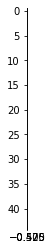

In [16]:
#plt.imshow(edit_image[top:])

plt.imshow(img[top:bottom,left:right])

In [17]:
import time

def crop(img, thresh=0):
    t1=time.time()
    
    size = img.shape
    print(size)
    edit_image=img.copy()
    #thresh = 0 #background pixel value

    thresh= thresh

    bg_pixels= np.repeat(thresh,size[1])#size [1] takes no. of colum 

    top=0
    count=0
    
    crop_value=int(20*size[0]/351)
    print(crop_value)
    for row in range(1, size[0]):
        if np.equal(bg_pixels,img[row]).any()==True:
            
            count+=1
        else:
            count=0
        
        if count>=crop_value:
            top=row-crop_value
            break
    
    bottom=size[0]-1
    
    for row in list(range(1,size[0]))[::-1]:
        if np.equal(bg_pixels, img[row]).any()== True:
            count+=1
        else:
            count=0
        
        if count>=crop_value:
            bottom=row+crop_value
            break
    
    print(time.time()-t1)
    return top,bottom
top,bottom = crop(img)
left,right=crop(img[top:bottom,:].T)


(351, 690)
20
0.004984140396118164
(690, 108)
39
0.004024028778076172


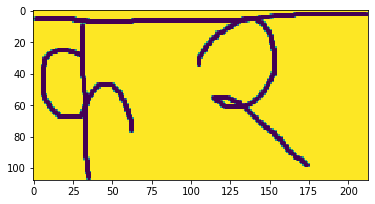

In [18]:
plt.imshow(img[top:bottom,left:right])

In [19]:
%timeit a=9

16.8 ns ± 0.78 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [20]:
%timeit crop(img)

(351, 690)
20
0.003988504409790039
(351, 690)
20
0.0019927024841308594
(351, 690)
20
0.004988431930541992
(351, 690)
20
0.002992868423461914
(351, 690)
20
0.002990245819091797
(351, 690)
20
0.006982088088989258
(351, 690)
20
0.0029914379119873047
(351, 690)
20
0.0029935836791992188
(351, 690)
20
0.0019941329956054688
(351, 690)
20
0.001994609832763672
(351, 690)
20
0.001994609832763672
(351, 690)
20
0.00402069091796875
(351, 690)
20
0.0014891624450683594
(351, 690)
20
0.0020279884338378906
(351, 690)
20
0.0019466876983642578
(351, 690)
20
0.001994609832763672
(351, 690)
20
0.001995563507080078
(351, 690)
20
0.003988027572631836
(351, 690)
20
0.0029916763305664062
(351, 690)
20
0.0023632049560546875
(351, 690)
20
0.001994609832763672
(351, 690)
20
0.0019943714141845703
(351, 690)
20
0.0019948482513427734
(351, 690)
20
0.0019969940185546875
(351, 690)
20
0.002029895782470703
(351, 690)
20
0.0019948482513427734
(351, 690)
20
0.0019948482513427734
(351, 690)
20
0.001996278762817383
(351, 6

0.004111289978027344
(351, 690)
20
0.003987312316894531
(351, 690)
20
0.0019960403442382812
(351, 690)
20
0.003036022186279297
(351, 690)
20
0.002989530563354492
(351, 690)
20
0.003979682922363281
(351, 690)
20
0.0029604434967041016
(351, 690)
20
0.002023935317993164
(351, 690)
20
0.001964569091796875
(351, 690)
20
0.0020265579223632812
(351, 690)
20
0.001970052719116211
(351, 690)
20
0.0020380020141601562
(351, 690)
20
0.0019931793212890625
(351, 690)
20
0.0019981861114501953
(351, 690)
20
0.0019490718841552734
(351, 690)
20
0.0020439624786376953
(351, 690)
20
0.0019915103912353516
(351, 690)
20
0.0019485950469970703
(351, 690)
20
0.0020318031311035156
(351, 690)
20
0.0019898414611816406
(351, 690)
20
0.0019943714141845703
(351, 690)
20
0.0019981861114501953
(351, 690)
20
0.0019919872283935547
(351, 690)
20
0.0019974708557128906
(351, 690)
20
0.001997232437133789
(351, 690)
20
0.001996755599975586
(351, 690)
20
0.0020182132720947266
(351, 690)
20
0.0
(351, 690)
20
0.0
(351, 690)
20
0.

0.0033800601959228516
(351, 690)
20
0.0030336380004882812
(351, 690)
20
0.002991914749145508
(351, 690)
20
0.002991199493408203
(351, 690)
20
0.003990650177001953
(351, 690)
20
0.003988742828369141
(351, 690)
20
0.0019943714141845703
(351, 690)
20
0.0030548572540283203
(351, 690)
20
0.0019745826721191406
(351, 690)
20
0.0019965171813964844
(351, 690)
20
0.001992464065551758
(351, 690)
20
0.0019526481628417969
(351, 690)
20
0.002037525177001953
(351, 690)
20
0.002001047134399414
(351, 690)
20
0.0010023117065429688
(351, 690)
20
0.0019974708557128906
(351, 690)
20
0.001987457275390625
(351, 690)
20
0.0019965171813964844
(351, 690)
20
0.0019931793212890625
(351, 690)
20
0.0019981861114501953
(351, 690)
20
0.0019903182983398438
(351, 690)
20
0.0010025501251220703
(351, 690)
20
0.0009996891021728516
(351, 690)
20
0.0019905567169189453
(351, 690)
20
0.0020303726196289062
(351, 690)
20
0.0
(351, 690)
20
0.0
(351, 690)
20
0.0
(351, 690)
20
0.0
(351, 690)
20
0.0
(351, 690)
20
0.0
(351, 690)
20


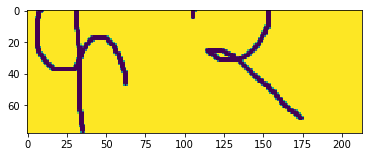

In [21]:
#segmentation

def segmentation(img,thresh=0):
    crop_img=image.copy()[30:]
    plt.imshow(crop_img)

image=img[top:bottom,left:right]
segmentation(image)

(108, 213)
(213, 98)
[0, 4, 103, 212]


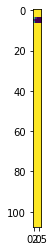

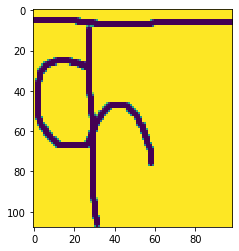

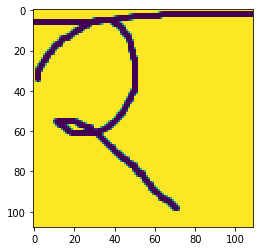

In [22]:
#segmentation

def segmentation(img,thresh=0):
    size=image.shape
    print(size)
    cv=int(10*size[0]/108)
    crop_img=image.copy()[cv:]
   # plt.imshow(crop_img)
    
    bg_pixel=np.repeat(255-thresh,size[1])
    t_img=crop_img.T
    plt.imshow(t_img)
    shape=t_img.shape
    print(shape)
    count_fp=0
    count_bp=0
    
    bg_pixel=np.repeat(255-thresh,shape[1])
    segment_col= [0, shape[0]-1]
    for row in range(1,shape[0]):
        if np.equal(bg_pixel, t_img[row]).all():
            segment_col.append(row)
#    print(segment_col)
    keys =len(segment_col)-1
    
    check=30
    new_cols=[segment_col[0],segment_col[-1]]
    for i in range(1,keys):
        if segment_col[i+1]-segment_col[i]>check:
            new_cols.append(segment_col[i])
    new_cols=sorted(new_cols)
    print(new_cols)
    
    segments=[]
    first = 0
    for key in new_cols[1:]:
        segment=image.T[first:key].T
        plt.imshow(segment)
        first=key
        plt.show()
        segments.append(segment)
    return segments

image=img[top:bottom,left:right]
segments = segmentation(image)

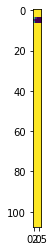

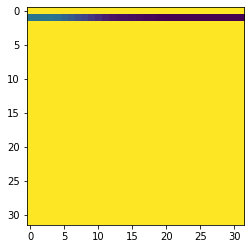

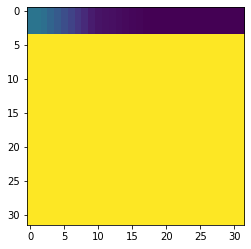

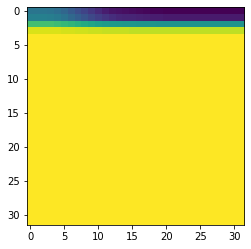

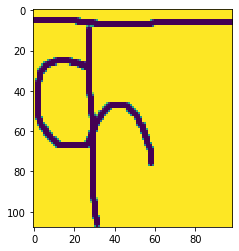

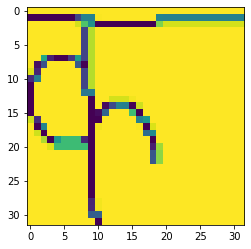

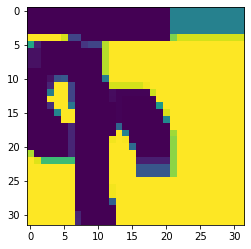

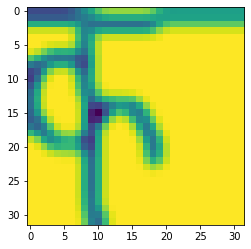

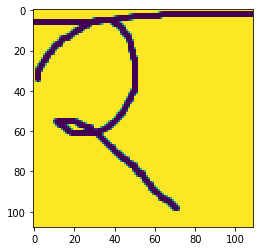

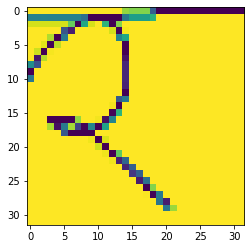

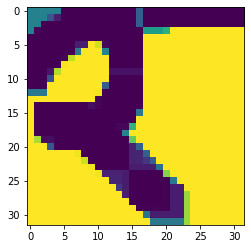

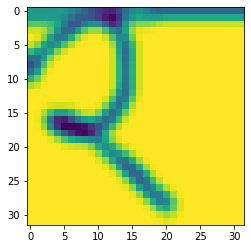

In [23]:
for segment in segments:
    plt.imshow(segment)
    plt.show()
    
    segment= cv2.resize(segment,(32,32))
    plt.imshow(segment)
    plt.show()
    
    kernel=np.ones((5,5))
    seg=cv2.erode(segment,kernel,1)
    plt.imshow(seg)
    plt.show()
    
    seg=cv2.GaussianBlur(segment,(5,5),1)
    plt.imshow(seg)
    plt.show()
    
    

च


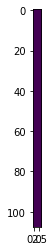

च


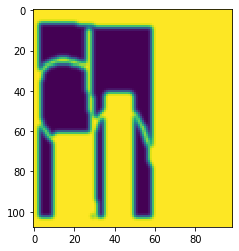

व


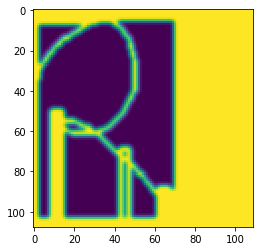

'चचव'

In [27]:
characters = '०,१,२,३,४,५,६,७,८,९,क,ख,ग,घ,ङ,च,छ,ज,झ,ञ,ट,ठ,ड,ढ,ण,त,थ,द,ध,न,प,फ,ब,भ,म,य,र,ल,व,श,ष,स,ह,क्ष,त्र,ज्ञ'
characters=characters.split(',')
final_label=""
for segment in segments:
    _,segment=cv2.threshold(segment,0,255,cv2.THRESH_BINARY_INV)
    seg=cv2.GaussianBlur(segment,(5,5),1)
    seg=seg.copy()
    
    segment=cv2.resize(segment,(32,32)).reshape(1,32,32,1) / 255
    prediction=model.predict(segment)
    label=characters[np.argmax(prediction)]
    final_label=final_label+label
    print(label)
    plt.imshow(seg)
    plt.show()
final_label

(array([ 96,  96,  96,  96,  96,  96,  96,  96,  96,  96,  96,  96,  96,
        96,  96,  96,  96,  96,  96,  96,  96,  96,  96,  96,  96,  96,
        96,  96,  96,  96,  96,  96,  96,  96,  96,  96,  96,  99,  99,
        99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 141,
       141, 141, 141, 141, 141, 141, 141, 141, 149, 149, 161, 161, 161,
       161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 168, 187, 187,
       188, 192], dtype=int64), array([310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322,
       323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335,
       336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 135, 136,
       137, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,
       212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,
       225, 226, 227, 228, 229,

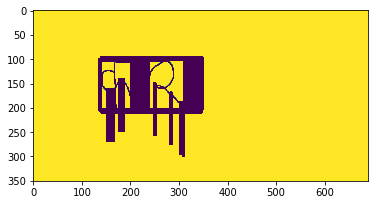

In [25]:
for segment in segments:
    template=segment
    width,height=template.shape[::-1]
    match=cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
#    print(match)
    threshold=0.8
    position=np.where(match>=threshold)
    print(position)
    
    for point in zip(*position[::-1]):
        cv2.rectangle(img,point,(point[0]+width,point[1]+height),(0,0,0),2)
    plt.imshow(img)

In [26]:
#OCR

#image acquistion
#image preprocessing
    #image filtering
    #image thresholding
    #image cropping
#image segmentation
#image prediction
#image detection(localisation)

#Model Creation
    #CNN

Project:
computer vision
    emotion classification
    
    gender detection
    
    encoder decoder
    
    gan 
    
    neural style transfer
    
    deep dream
        